In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin,cos,pi,sqrt,exp,ceil
%matplotlib inline
from matplotlib import style
style.use('seaborn-notebook')

In [2]:
ex_1 = lambda t,y: -2*t*y**2

### Euler

In [3]:
def euler(funcao,y0,intervalo_T,passo):
    h = passo
    T = intervalo_T[1] - intervalo_T[0]
    N = int(-(-T//h))
    Y_t = np.ones(N+1)*y0
    t = np.ones(N+1)*intervalo_T[0]
    for k in range(1,N+1):
        t[k] = k*h
        K = funcao(t[k-1],Y_t[k-1])
        
        Y_t[k] = Y_t[k-1] + K*h
        
    return t,Y_t
    
    

In [4]:
xx2,yy2 = euler(ex_1,1,[0,10],.05)

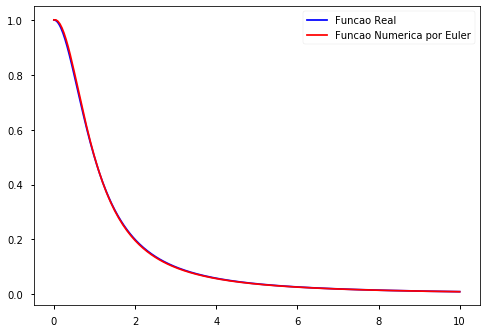

In [5]:
fig,ax = plt.subplots()
X_real = np.linspace(0,10,400)
Vet_y = np.vectorize(lambda t: 1/(1+t**2))
ax.plot(X_real,Vet_y(X_real),'b-',label='Funcao Real')
ax.plot(xx2,yy2,'r-',label='Funcao Numerica por Euler')
ax.legend()

Aproxima bem pra passo = .05 YEEE

### RK 2a ordem

In [6]:
def ordem2_RK(funcao,y0,intervalo_T,passo):
    h = passo
    T = intervalo_T[1] - intervalo_T[0]
    N = int(-(-T//h))
    Y_t = np.ones(N+1)*y0
    t = np.ones(N+1)*intervalo_T[0]
    for k in range(1,N+1):
        t[k] = k*h
        K1 = funcao(t[k-1],Y_t[k-1])
        K2 = funcao(t[k-1]+h,Y_t[k-1] + h*K1)
        Y_t[k] = Y_t[k-1] + (h/2.0)*(K1 + K2)
        
    return t,Y_t

In [7]:
xx2_RK,yy2_RK = ordem2_RK(ex_1,1,[0,10],0.05)

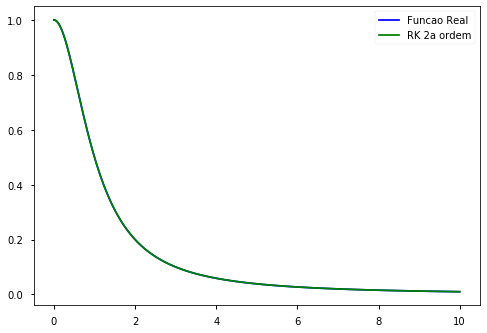

In [8]:
plt.plot(X_real,Vet_y(X_real),'b-',label='Funcao Real')
plt.plot(xx2_RK,yy2_RK,'g-',label='RK 2a ordem')
plt.legend()

### RK 4a ordem

In [9]:
def ordem4_RK(funcao,y0,intervalo_T,passo):
    h = passo
    T = intervalo_T[1] - intervalo_T[0]
    N = int(-(-T//h))
    Y_t = np.ones(N+1)*y0
    t = np.ones(N+1)*intervalo_T[0]
    for k in range(1,N+1):
        t[k] = k*h
        
        K1 = funcao(t[k-1],
                    Y_t[k-1])
        K2 = funcao(t[k-1]+h/2.0,
                    Y_t[k-1] + (h/2.0)*K1)
        K3 = funcao(t[k-1]+h/2.0,
                    Y_t[k-1] + (h/2.0)*K2)
        K4 = funcao(t[k-1]+h,
                    Y_t[k-1]+h*K3)
        
        Y_t[k] = Y_t[k-1]+(h/6.0)*(K1+2*K2+2*K3+K4)
    
    return t,Y_t

In [10]:
xx4_rk,yy4_rk = ordem4_RK(ex_1,1,[0,10],0.05)

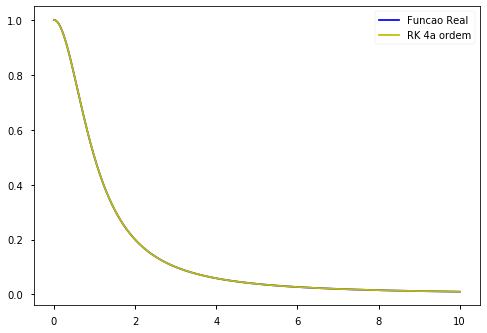

In [11]:
plt.plot(X_real,Vet_y(X_real),'b-',label='Funcao Real')
plt.plot(xx4_rk,yy4_rk,'y-',label='RK 4a ordem')
plt.legend()

-------------!!!TESTE DE TABELA COM O PANDAS!!! --------------

para h = 0.05:

In [12]:
import pandas as pd
df = pd.DataFrame(columns=['T','Sol.Exata','Euler','RK-2a ordem',
                          'RK-4a ordem'])
df['T'] = xx2
df['Sol.Exata'] = Vet_y(xx2)
df['Euler'] = yy2
df['RK-2a ordem'] = yy2_RK
df['RK-4a ordem'] = yy4_rk
df.head(10)

,T,Sol.Exata,Euler,RK-2a ordem,RK-4a ordem
0,0.00,1.000000,1.000000,1.000000,1.000000
1,0.05,0.997506,1.000000,0.997500,0.997506
2,0.10,0.990099,0.995000,0.990087,0.990099
3,0.15,0.977995,0.985100,0.977978,0.977995
4,0.20,0.961538,0.970543,0.961519,0.961538
5,0.25,0.941176,0.951704,0.941158,0.941176
6,0.30,0.917431,0.929061,0.917417,0.917431
7,0.35,0.890869,0.903166,0.890863,0.890869
8,0.40,0.862069,0.874616,0.862076,0.862069
9,0.45,0.831601,0.844018,0.831624,0.831601


### Programa Geral para EDO de 1a ordem:

In [13]:
def edo_1ordem(funcao,y0,intervalo_T,passo,metodo='rk4'):
    '''"Integra" uma EDO de primeira ordem a partir de 3 diferentes
    metodos, escolha a criterio do usuario.
    
    Argumentos:
    
        Funcao(t,Y)
            Ex: lambda t,Y = 1/t**2 * Y;
            
        y0  
            Ex: .5;
        
        Intervalo de tempo T
            Intervalo de integracao T.
            Ex: 0 <= t <= 10  --> intervalo_T = [0,10];
        
        Passo
            Incremento h a ser aplicado a t a cada iteracao.
            No geral, metodos de menor ordem devem possuir menores
            valores Passo para obter boa precisao.
        
    Metodos aceitos:
        Runge-Kutta de 4a ordem: "rk4", metodo default.
        Runge-Kutta de 2a ordem: "rk2".
        Runge-Kutta de 1a ordem ou metodo de Euler:"euler".
    '''
    if metodo == 'euler':
        return euler(funcao,y0,intervalo_T,passo)
    
    elif metodo =='rk2':
        return ordem2_RK(funcao,y0,intervalo_T,passo)
    
    else:
        return ordem4_RK(funcao,y0,intervalo_T,passo)

## EDOS DE 2a ORDEM

In [14]:
def taylor(funcao,y0,y_linha0,intervalo_T,passo):
    h = passo
    T = intervalo_T[1] - intervalo_T[0]
    N = int(-(-T//h))
    Y_t = np.ones(N+1)*y0
    t = np.ones(N+1)*intervalo_T[0]
    der = y_linha0
    
    for k in range(1,N+1):
        t[k] = k*h
        der_segunda = funcao(t[k-1],Y_t[k-1],der)
        
        Y_t[k] = Y_t[k-1] + der*h + (der_segunda/2.0)*h**2
        
        der = der + der_segunda*h
        
    return t,Y_t

In [15]:
def RKN(funcao,y0,y_linha0,intervalo_T,passo):
    h = passo
    T = intervalo_T[1] - intervalo_T[0]
    N = int(-(-T//h))
    Y_t = np.ones(N+1)*y0
    t = np.ones(N+1)*intervalo_T[0]
    der = y_linha0
    
    for k in range(1,N+1):
        t[k] = k*h
        
        K1 = (h/2.0)*funcao(t[k-1],Y_t[k-1],der)
        
        Q = (h/2.0)*(der + K1/2.0)
        
        K2 = (h/2.0)*funcao(t[k-1]+h/2.0,
                           Y_t[k-1]+Q,
                           der+K1)
        K3 = (h/2.0)*funcao(t[k-1]+h/2.0,
                           Y_t[k-1]+Q,
                           der+K2)
        L = h*(der+K3)
        K4 = (h/2.0)*funcao(t[k-1]+h,
                           Y_t[k-1]+L,
                           der+2*K3)
        
        Y_t[k] = Y_t[k-1] + h*(der+(1.0/3)*(K1+K2+K3))
        
        der = der + (1.0/3)*(K1 + 2*K2 + 2*K3 + K4)
        
    return t,Y_t

In [16]:
def edo_2ordem(funcao,y0,y_linha0,intervalo_T,passo,metodo='rkn'):
    '''"Integra" uma EDO de segunda ordem a partir de 2 diferentes
    metodos, escolha a criterio do usuario.
    
    Argumentos:
    
        Funcao(t,Y,Y')
            Ex: lambda t,Y = 1/t**2 * Y + Y';
            
        y0  
            Ex: .5 (valor de y inicial);
        
        y_linha0
            Ex: 0 (valor inicial da derivada de y)
            
        Intervalo de tempo T
            Intervalo de integracao T.
            Ex: 0 <= t <= 10  --> intervalo_T = [0,10];
        
        Passo
            Incremento h a ser aplicado a t a cada iteracao.
            No geral, o metodo de menor ordem (taylor) deve possuir menor
            valor 'Passo' para obter boa precisao.
        
    Metodos aceitos:
        Runge–Kutta-Nyström: "rkn", metodo default.
        'Expansao em Serie de Taylor': "taylor".
        '''
    if metodo =='taylor':
        return taylor(funcao,y0,y_linha0,intervalo_T,passo)
    else:
        return RKN(funcao,y0,y_linha0,intervalo_T,passo)

TESTES ABAIXO ou **EXERCICIO 3** kk

In [17]:
exemplo_slide = lambda t,y,y_linha : -10 - y_linha*abs(y_linha)

In [18]:
aaaa,bbbb = RKN(exemplo_slide,0,0,[0,20],0.1)

In [19]:
cccc,dddd=taylor(exemplo_slide,0,0,[0,20],0.1)

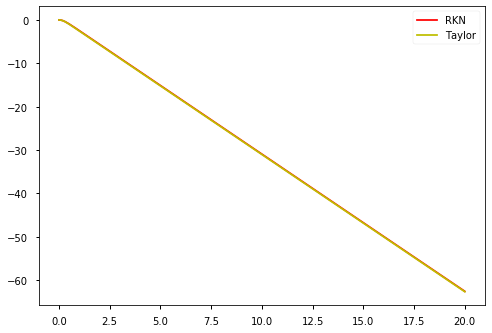

In [20]:
plt.plot(aaaa,bbbb,'r-',label='RKN')
plt.plot(cccc,dddd,'y-',label='Taylor')
plt.legend()

### Exercicio 2

$$my''(t)+cy'(t)+ky(t)=F(t)$$ onde $m=1$ $c=0.2$, $k=1$;
$$F(t)=2sin(wt)+sin(2wt)+cos(3wt)$$  onde $w=0.5$ <br><br>  Dadas as condicoes iniciais: $y'(0)=y(0)=0.0$

**Primeiro passo**:
- Definir explicitamente $y''(t)$

$$y''(t) = 2sin(0.5t)+sin(t)+cos(1.5t)-0.2y'(t)-y(t)$$

In [21]:
func_ex2 = lambda t,y_t,y_linha : 2*sin(0.5*t)+sin(t)+cos(1.5*t)-0.2*y_linha-y_t

**Tomando h = 0.3 para ambos os algoritmos:**

In [22]:
rkn_x,rkx_y = edo_2ordem(func_ex2,0.0,0.0,[0,100],0.3)
taylor_x,taylor_y = edo_2ordem(func_ex2,0.0,0.0,[0,100],0.3,metodo='taylor')

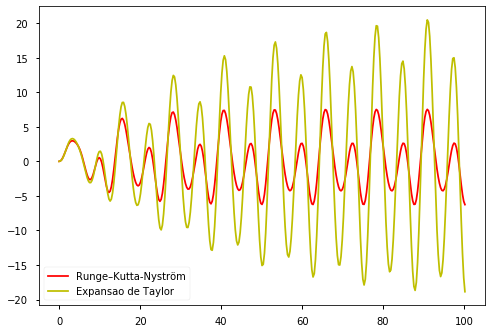

In [23]:
plt.plot(rkn_x,rkx_y,'r-',label='Runge–Kutta-Nyström')
plt.plot(taylor_x,taylor_y,'y-',label='Expansao de Taylor')
plt.legend(loc='lower left')

**h = 0.2:**

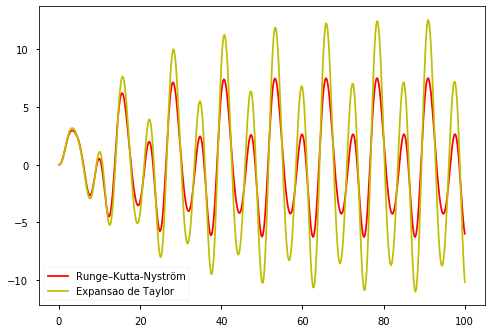

In [24]:
rkn_x2,rkx_y2 = edo_2ordem(func_ex2,0.0,0.0,[0,100],0.2)
taylor_x2,taylor_y2 = edo_2ordem(func_ex2,0.0,0.0,[0,100],0.2,metodo='taylor')
plt.plot(rkn_x2,rkx_y2,'r-',label='Runge–Kutta-Nyström')
plt.plot(taylor_x2,taylor_y2,'y-',label='Expansao de Taylor')
plt.legend(loc='lower left')

**h = 0.15** 

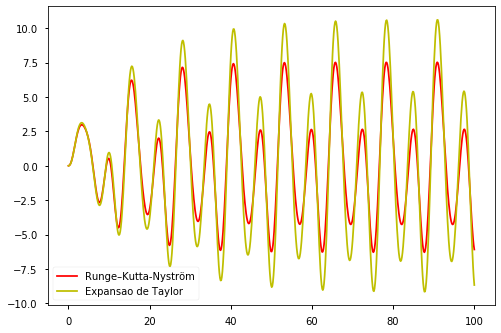

In [25]:
rkn_x3,rkx_y3 = edo_2ordem(func_ex2,0.0,0.0,[0,100],0.15)
taylor_x3,taylor_y3 = edo_2ordem(func_ex2,0.0,0.0,[0,100],0.15,metodo='taylor')
plt.plot(rkn_x3,rkx_y3,'r-',label='Runge–Kutta-Nyström')
plt.plot(taylor_x3,taylor_y3,'y-',label='Expansao de Taylor')
plt.legend(loc='lower left')

**Mantendo h = 0.15 para Runge–Kutta-Nyström e definindo novo h = 0.01 para Taylor:**

In [26]:
rkn_hx,rkn_hy = edo_2ordem(func_ex2,0.0,0.0,[0,100],0.2)
taylor_hx,taylor_hy = edo_2ordem(func_ex2,0.0,0.0,[0,100],0.01,metodo='taylor')

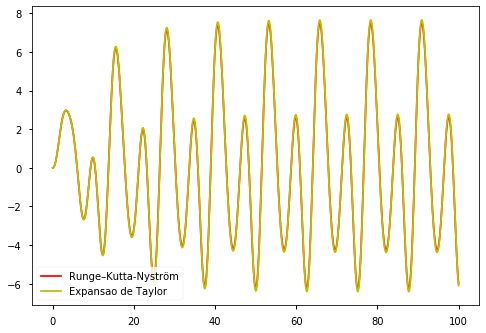

In [27]:
plt.plot(rkn_hx,rkn_hy,'r-',label='Runge–Kutta-Nyström')
plt.plot(taylor_hx,taylor_hy,'y-',label='Expansao de Taylor')
plt.legend()

In [28]:
a=style.available
print(a)

['seaborn-colorblind', 'bmh', 'seaborn-deep', 'seaborn', '_classic_test', 'Solarize_Light2', 'fast', 'seaborn-white', 'dark_background', 'seaborn-muted', 'grayscale', 'seaborn-pastel', 'seaborn-bright', 'seaborn-whitegrid', 'fivethirtyeight', 'seaborn-ticks', 'seaborn-dark', 'seaborn-notebook', 'seaborn-poster', 'seaborn-talk', 'seaborn-dark-palette', 'ggplot', 'seaborn-darkgrid', 'seaborn-paper', 'tableau-colorblind10', 'classic']


Text(0.5, 1, 'rkn_h = 0.15 | taylor_h = 0.01')

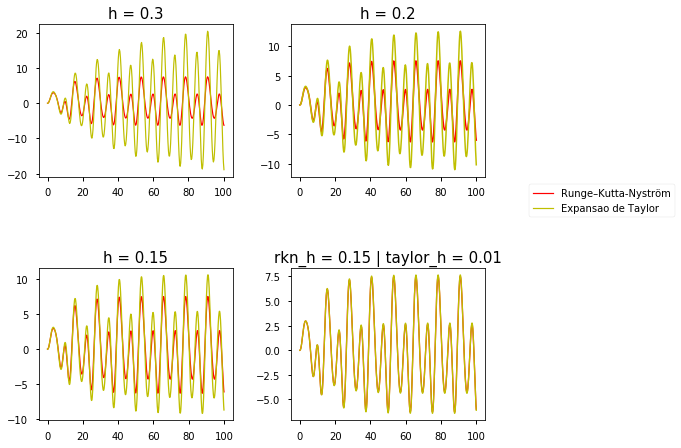

In [29]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
plt.tight_layout()
plt.subplots_adjust(left = 0.125,right = 0.9,bottom = 0.0,top = 1,wspace = 0.3,hspace = 0.6)
ax1.plot(rkn_x,rkx_y,'r-',label='Runge–Kutta-Nyström',linewidth=1.2)
ax1.plot(taylor_x,taylor_y,'y-',label='Expansao de Taylor',linewidth=1.2)
ax1.set_title('h = 0.3',{'fontsize': 15})
ax1.legend(bbox_to_anchor=(2.5, -0.3),loc='lower left')
ax2.plot(rkn_x2,rkx_y2,'r-',linewidth=1.5)
ax2.plot(taylor_x2,taylor_y2,'y-',linewidth=1.5)
ax2.set_title('h = 0.2',{'fontsize': 15})
ax3.plot(rkn_x3,rkx_y3,'r-',linewidth=1.3)
ax3.plot(taylor_x3,taylor_y3,'y-',linewidth=1.3)
ax3.set_title('h = 0.15',{'fontsize': 15})
ax4.plot(rkn_hx,rkn_hy,'r-',linewidth=1.3)
ax4.plot(taylor_hx,taylor_hy,'y-',linewidth=1.3)
ax4.set_title('rkn_h = 0.15 | taylor_h = 0.01',{'fontsize': 15})